In [4]:
import numpy as np
import pandas as pd
from datetime import date
from dateutil.relativedelta import relativedelta

data_path = "../data/networks"

In [5]:
# histograph of volume of tweets in time buckets
tweet_df = pd.read_csv(data_path + "/2147762_tweets.csv")
tweet_df['article_id'] = 2147762
tweet_df['created_at']= pd.to_datetime(tweet_df['created_at'])
tweet_df.head()

,id,url_id,user_id,created_at,type,is_mention,article_id
0,1321065845850886144,None,None,2020-10-27 12:26:56+00:00,None,None,2147762
1,1321101083029213185,93234779,1157363558574886914,2020-10-27 14:46:57+00:00,origin,True,2147762
2,1321101079908679681,93234400,812841872389472257,2020-10-27 14:46:56+00:00,retweet,False,2147762
3,1321101028469727232,93234400,856756669270941696,2020-10-27 14:46:44+00:00,retweet,False,2147762
4,1321100982126841856,93234400,1219306174983680000,2020-10-27 14:46:33+00:00,retweet,False,2147762


In [6]:
# histograph of volume of tweets in time buckets
tweet_df2 = pd.read_csv(data_path + "/2168163_tweets.csv")
tweet_df2['article_id'] = 2168163
tweet_df2['created_at']= pd.to_datetime(tweet_df2['created_at'])
tweet_df2.head()

,id,url_id,user_id,created_at,type,is_mention,article_id
0,1324122449940779009,None,None,2020-11-04 22:52:47+00:00,None,None,2168163
1,1324228470369587200,None,None,2020-11-05 05:54:04+00:00,None,None,2168163
2,1324228469975252993,None,None,2020-11-05 05:54:04+00:00,None,None,2168163
3,1324228464132739072,None,None,2020-11-05 05:54:03+00:00,None,None,2168163
4,1324228455538438144,None,None,2020-11-05 05:54:01+00:00,None,None,2168163


In [11]:
concat_df = pd.concat([tweet_df, tweet_df2])

(87267, 7)


In [3]:
time_tweet_df = tweet_df.copy()

time_tweet_df["date"] = tweet_df.created_at.apply(lambda dt: dt.date)
time_tweet_df["hour"] = tweet_df.created_at.dt.hour
# time_tweet_df.to_csv("time_tweet.csv")
time_tweet_df

,id,url_id,user_id,created_at,type,is_mention,date,hour
0,1321065845850886144,None,None,2020-10-27 12:26:56+00:00,None,None,2020-10-27,12
1,1321101083029213185,93234779,1157363558574886914,2020-10-27 14:46:57+00:00,origin,True,2020-10-27,14
2,1321101079908679681,93234400,812841872389472257,2020-10-27 14:46:56+00:00,retweet,False,2020-10-27,14
3,1321101028469727232,93234400,856756669270941696,2020-10-27 14:46:44+00:00,retweet,False,2020-10-27,14
4,1321100982126841856,93234400,1219306174983680000,2020-10-27 14:46:33+00:00,retweet,False,2020-10-27,14
...,...,...,...,...,...,...,...,...
1906,1321074477178982400,93234400,1223356417,2020-10-27 13:01:14+00:00,retweet,False,2020-10-27,13
1907,1321074365077700615,93239923,1156017579686653952,2020-10-27 13:00:47+00:00,origin,True,2020-10-27,13
1908,1321074325823303680,93234400,4080552432,2020-10-27 13:00:38+00:00,quote,False,2020-10-27,13
1909,1321074658628820993,93234400,890007603711012864,2020-10-27 13:01:57+00:00,retweet,False,2020-10-27,13


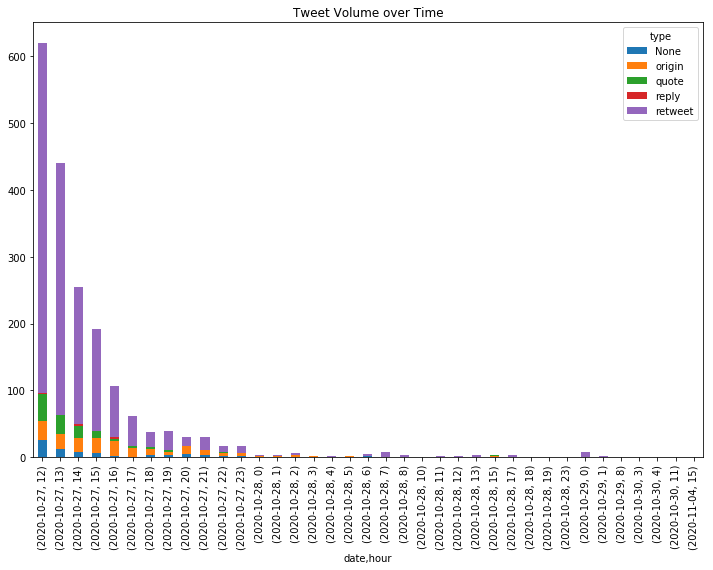

In [22]:
grouped_df = time_tweet_df.groupby(["date", "hour", "type"]).count()["id"].unstack("type").fillna(0)
grouped_df.plot.bar(title="Tweet Volume over Time", figsize=(12,8), stacked=True)
# Use log scale on Y axis
# x y plots instead of bar graph
# When you want to show cloud of points (summarize articles as x y plot in weird space, ex rise & decay)
# What are the interesting features on a per article basis
# SPike height, number of spikes, etc
# Probably generate a bunch of different metrics, most of which will be boring
# Each person can probably write somethign that generates a metrics
# Think about how to summarize articles as separate features.
# Use date published as a metric, (ex. time since patient 0)
# Term frequency inverse document frequency
# Exponent for exponential decay (coefficient of exponential decay)